# Sesión 21


**Colaboradores**

- César Ricardo Segura Alejo
- Luis Daniel Rodriguez Correa

En esta sección, presentamos una teoría elegante relacionada con los algoritmos greedy. Esta teoría describe numerosos escenarios en los que el enfoque greedy produce soluciones óptimas y se basa en estructuras combinatorias llamadas "Matroids". Aunque la teoría no abarca todos los casos en los que se puede aplicar un algoritmo greedy (como el problema de selección de actividades (**Sesión 20**) o el problema de codificación de Huffman (**Sesión 19**) , sí cubre muchos casos de interés práctico. 

<a id='indice'></a>

### Índice
---

1. [Matroids](#Matroids)
   1. [Ejemplos de Matroides](#EjemplosM)
2. [Matroides en Algoritmos Greedy](#MatroidsGr)
   1. [Algoritmo Greedy General para Matroides](#General)
   2. [Problema: Árbol Generador Mínimo](#Minimo)
   3. [Algoritmo de Kruskal (Greedy)](#Kruskal)
4. [Implementacion](#implementacion)
5. [Problema de la mochila](#mochila)
6. [Implementacion](#implementacion2)
7. [Referencias](#referencias)
---


<a id='Matroids'></a>
## 1 Matroids

Un **matroid** es un par ordenado $M = (S, \mathcal{I})$ que satisface las siguientes condiciones.

0. $\emptyset \in$ $\mathcal{I}$.

1. $\ S$ es un conjunto finito
   
2. $\mathcal{I} \subseteq \, \mathbb{P}(S)$ es una familia de subconjuntos de S no vacia, llamados **subconjuntos independientes** de **S**, tales que, si $\ B\, \in \, \mathcal{I}$ y  $\ A\, \subseteq \, B$, entonces $\ A\, \in \, \mathcal{I}$. Decimos que la familia $\mathcal{I}$ es **hereditaria**, si satisface esta propiedad.
   
3. Si $\ A\, \in \, \mathcal{I}$, $\ B \, \in \, \mathcal{I}$ y $\bracevert A \bracevert < \bracevert B \bracevert$, entonces existe algún elemento $\ x\, \in \$, $B-A$ $ tal que $\ A\, \cup \, x \, \in \, \mathcal{I}$. A esta propiedad la llamamos **propiedad de intercambio**.


 Referencias [$[1]$](#referencias).

Regresar al **[Índice](#indice)**.

# Algunos ejemplos de Matroids <a id='EjemplosM'></a>


### a) Matroid en Algebra lineal  
- Conjunto: Un conjunto finito de vectores $E$ en un espacio vectorial.  
- Colección independiente $\mathcal{I}$: Todos los subconjuntos de vectores que son linealmente independientes.  
- Propiedades: Este matroid surge naturalmente en álgebra lineal, ya que cumple las propiedades de intercambio y herencia necesarias para ser un matroide.  

### b) Matroid gráfico  
- Conjunto: El conjunto de aristas $E$ de un grafo $G = (V, E)$.  
- Colección independiente $\mathcal{I}$: Los subconjuntos de aristas que no contienen ciclos.  
- Aplicaciones: Este matroid es clave en algoritmos como el de Kruskal para encontrar árboles generadores mínimos.  

### c) Matroid uniforme  
- Conjunto: Un conjunto $E$ con $n$ elementos.  
- Colección independiente $\mathcal{I}$: Todos los subconjuntos de $E$ que tienen a lo sumo $k$ elementos, donde $k$ es un parámetro fijo.  
- Propiedades: Este es uno de los matroids más simples y se usa en problemas donde hay un límite en el tamaño del conjunto seleccionado.  

### d) Matroid de partición  
- Conjunto: Un conjunto $E$ particionado en $k$ subconjuntos $E_1, E_2, \dots, E_k$.  
- Colección independiente $\mathcal{I}$: Subconjuntos de $E$ que contienen como máximo un número especificado de elementos de cada $E_i$.  
- Aplicaciones: Este matroid se aplica en problemas de asignación y selección bajo restricciones de categorías.  


Regresar al **[Índice](#indice)**.

## 2  Matroids en Algoritmos Greedy <a id='General'></a>

Los matroids ofrecen una base sólida para aplicar algoritmos **greedy** y garantizar que la solución obtenida sea óptima. La clave está en que los matroides cumplen ciertas propiedades, como **intercambio**, que permiten a GREEDY construir soluciones viables y óptimas paso a paso.  

### Algoritmo Greedy General para Matroids  

1. **Definir el conjunto y pesos:**  
   - Sea $E$ el conjunto base de elementos, y $w: E \to \mathbb{R}$ una función de peso.  
2. **Ordenar los elementos:**  
   - Ordenar los elementos de $E$ en orden no creciente de peso: $w(e_1) \geq w(e_2) \geq \dots \geq w(e_n)$.  
3. **Construir el conjunto solución:**  
   - Inicializar $S \leftarrow \emptyset$.  
   - Iterar por los elementos $e_i$:  
     - Si $S \cup \{e_i\} \in \mathcal{I}$ (es independiente), agregar $e_i$ a $S$.  
     - De lo contrario, descartar $e_i$. 

**Pseudocodigo**

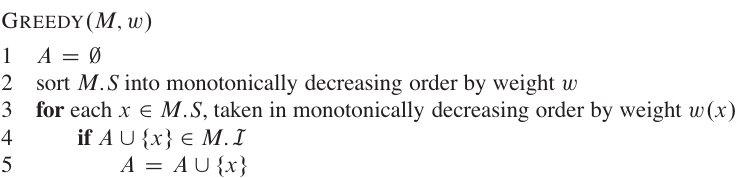

Demostrar que un algoritmos greedy es correcto es complejo, ya que requiere garantizar que las decisiones locales conduzcan a una solución global óptima. Sin embargo, los matroides simplifican este proceso al proporcionar una estructura matemática con propiedades como la independencia y el intercambio, que aseguran automáticamente la validez de las decisiones greedy. Por ejemplo, en problemas como el Árbol Generador Mínimo, los matroids garantizan que las soluciones son óptimas sin necesidad de análisis exhaustivos. Así, los matroids no solo facilitan el diseño de algoritmos greedy, sino también su demostración.

##  Problema: Árbol Generador Mínimo <a id='Minimo'></a>

El problema del **Árbol Generador Mínimo** (Minimum Spanning Tree, MST) busca un subconjunto de las aristas de un grafo $G = (V, E)$ que:

- Conecte todos los nodos (formando un árbol).  
- Tenga el peso total mínimo.  

Usararemos en **Matroid Grafico** de tal forma que su conjunto base e independiente tenga las siguientes caracteristicas

1. Conjunto base ($E$): 
   Representa las aristas del grafo.

2. Conjunto independiente ($\mathcal{I}$):
   subconjuntos de aristas que no forma ciclos.  
   - Formalmente, si $T \subseteq E$ es un subconjunto tal que $T$ no contiene ningún ciclo, entonces $T \in \mathcal{I}$.  

La relación entre ciclos y independencia define el matroid gráfico y permite aplicar algoritmos greedy.



##  Algoritmo de Kruskal (Greedy) <a id='Kruskal'></a>

El algoritmo de **Kruskal** construye el MST iterativamente, asegurando en cada paso que el subconjunto actual sea independiente. A continuación, desglosamos cada paso en términos de matroids:

### **Pasos del Algoritmo:**

1. Ordenar las aristas por peso en orden creciente:
   Esto prioriza las aristas más "económicas", alineándose con el principio greedy de tomar decisiones localmente óptimas.  

   Sea $e_1, e_2, \dots, e_m$ una ordenación tal que $w(e_1) \leq w(e_2) \leq \dots \leq w(e_m)$.  

2. Inicializar $S \leftarrow \emptyset$:
   El conjunto $S$ es el subconjunto independiente que se construirá gradualmente para formar el MST.

3. Iterar por cada arista $e$ en el orden:
   - Si agregar $e$ al conjunto $S$ no forma un ciclo ($S \cup \{e\} \in \mathcal{I}$), entonces agregar $e$ a $S$.  
   - De lo contrario, descartar $e$.  

   Verificar la independencia se realiza con estructuras como **Union-Find**, que determinan si dos nodos están ya conectados en el mismo componente.  

4. Finalización:
   El proceso termina cuando se han añadido $|V| - 1$ aristas, dado que un árbol generador mínimo siempre tiene $n - 1$ aristas para un grafo con $n$ nodos.

Regresar al **[Índice](#indice)**.

## **Ejemplo Intuitivo**

Consideremos un grafo con los siguientes nodos y pesos en las aristas:

- **Nodos:** $V = \{1, 2, 3, 4\}$.  
- **Aristas:**  
  \[
  E = \{(1, 2, 1), (1, 3, 4), (2, 3, 2), (2, 4, 3), (3, 4, 5)\}
  \]  

### **Pasos del algoritmo:**

1. **Ordenar las aristas:**  
   \[
   \{(1, 2, 1), (2, 3, 2), (2, 4, 3), (1, 3, 4), (3, 4, 5)\}.
   \]  

2. **Inicializar $S \leftarrow \emptyset$.**  

3. **Agregar aristas mientras no formen ciclos:**  
   - Añadir $(1, 2, 1) \rightarrow S = \{(1, 2)\}$.  
   - Añadir $(2, 3, 2) \rightarrow S = \{(1, 2), (2, 3)\}$.  
   - Añadir $(2, 4, 3) \rightarrow S = \{(1, 2), (2, 3), (2, 4)\}$.  

   La siguiente arista $(1, 3, 4)$ forma un ciclo, por lo que se descarta.  

4. **Finalmente:** El MST es $\{(1, 2), (2, 3), (2, 4)\}$ con peso $1 + 2 + 3 = 6$.

## **Visualización**


 **Grafo original:**


    1 --(4)-- 3
     |       / \
    (1)    (2)  (5)
     |    /     \
     2 --(3)---- 4




 **MST:**


    1      3
     |     |
    (1)   (2)
     |     |
     2 --(3)-- 4


Regresar al **[Índice](#indice)**.

<a id='implementacion'></a>
### 3. Implementación 

In [101]:
using Plots

In [106]:
# Definición de la estructura de datos para representar un grafo
struct Edge
    u::Int  # Nodo 1
    v::Int  # Nodo 2
    weight::Float64  # Peso de la arista
end

# Función para encontrar el conjunto al que pertenece un nodo (Union-Find)
function find(parent, node)
    if parent[node] != node
        parent[node] = find(parent, parent[node])  # Path compression
    end
    return parent[node]
end

# Función para unir dos subconjuntos (Union-Find)
function union(parent, rank, u, v)
    root_u = find(parent, u)
    root_v = find(parent, v)
    
    if root_u != root_v
        if rank[root_u] > rank[root_v]
            parent[root_v] = root_u
        elseif rank[root_u] < rank[root_v]
            parent[root_u] = root_v
        else
            parent[root_v] = root_u
            rank[root_u] += 1
        end
    end
end

# Algoritmo de Kruskal
function kruskal(num_nodes::Int, edges::Vector{Edge})
    # Ordenar las aristas por peso
    sorted_edges = sort(edges, by = e -> e.weight)
    
    # Inicializar estructuras para Union-Find
    parent = collect(1:num_nodes)
    rank = fill(0, num_nodes)
    
    # Conjunto solución para el Árbol Generador Mínimo
    mst = Vector{Edge}()
    
    for edge in sorted_edges
        u, v = edge.u, edge.v
        # Si no forma un ciclo, agregar la arista al MST
        if find(parent, u) != find(parent, v)
            push!(mst, edge)
            union(parent, rank, u, v)
        end
    end
    
    return mst
end


kruskal (generic function with 1 method)

In [108]:

# Ejemplo

edges = [
    Edge(1, 2, 1.0),
    Edge(1, 3, 4.0),
    Edge(2, 3, 2.0),
    Edge(2, 4, 3.0),
    Edge(3, 4, 5.0)
]

num_nodes = 4
mst = kruskal(num_nodes, edges)

# Mostrar el Árbol Generador Mínimo
println("Árbol Generador Mínimo:")
for edge in mst
    println("Nodo $(edge.u) - Nodo $(edge.v) | Peso: $(edge.weight)")
end

Árbol Generador Mínimo:
Nodo 1 - Nodo 2 | Peso: 1.0
Nodo 2 - Nodo 3 | Peso: 2.0
Nodo 2 - Nodo 4 | Peso: 3.0


Regresar al **[Índice](#indice)**.

# **Problema de la Mochila**  <a id='mochila'></a>

### **Definición:**
El problema de la mochila consiste en seleccionar un subconjunto de objetos con el objetivo de maximizar el valor total, respetando la capacidad máxima de la mochila.

$\text{Maximizar } \sum_{i=1}^{n} valor_i \cdot x_i$

donde:

El peso total de los objetos seleccionados no debe exceder la capacidad máxima de la mochila:
$\sum_{i=1}^{n} peso_i \cdot x_i \leq C$
donde:

- $x_i \in \{0, 1\}$ indica si el objeto $i$ está incluido en la mochila.

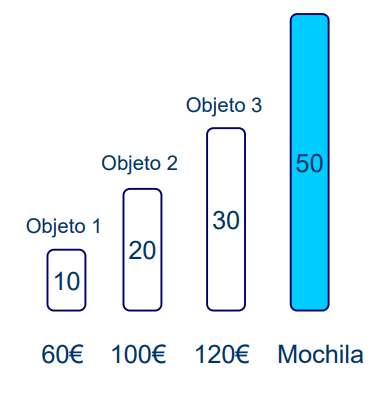

 Capacidad de la mochila: $50$ unidades de peso.
 
 Objetos disponibles:
   - Objeto 1: Peso = $10$, Valor = **60€**.
   - Objeto 2: Peso = $20$, Valor = **100€**.
   - Objeto 3: Peso = $30$, Valor = **120€**.


# ¿Cómo seleccionamos los objetos de la mochila?

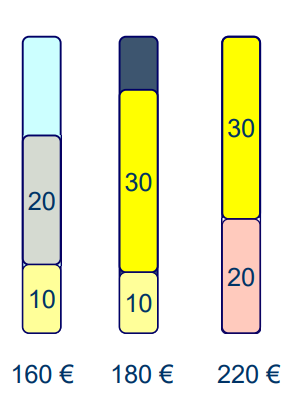

# **Extensión: Problema de la Mochila Fraccional**


En el problema de la **mochila fraccional**, a diferencia del problema 0-1, se permite tomar fracciones de los objetos, lo que permite una solución más flexible. Este problema se puede resolver de manera eficiente utilizando un enfoque **greedy**.

 Capacidad de la mochila $C = 50$ unidades de peso.
 Objetos disponibles: Igual que en el problema anterior:
   - Objeto 1: Peso = $10$, Valor = **60€**.
   - Objeto 2: Peso = $20$, Valor = **100€**.
   - Objeto 3: Peso = $30$, Valor = **120€**.


$\text{Maximizar } \sum_{i=1}^{n} valor_i \cdot x_i$


 El peso total de los objetos con fracciones no debe exceder la capacidad de la mochila:

$\sum_{i=1}^{n} peso_i \cdot x_i \leq C$

donde:
- $0 \leq x_i \leq 1$ indica la fracción del objeto $i$ que se incluye en la mochila.

### **Enfoque Greedy para la Mochila Fraccional:**
El enfoque consiste en seleccionar los objetos en función de la relación **valor/peso** en orden descendente, asegurando que la capacidad de la mochila no sea excedida.

 Paso 1: Calcular la relación **valor/peso** para cada objeto:
   
$\text{Ratio } = \frac{\text{valor}_i}{\text{peso}_i}$

 Paso 2: Ordenar los objetos por esta relación en orden descendente.
 Paso 3: Seleccionar los objetos completos o fracciones de ellos:
   - Si el objeto cabe completo en la mochila, incluirlo.
   - Si no cabe, tomar la fracción máxima posible.

## Definición del Matroid
 Conjunto Base ($E$):  
   
$E = \{1, 2, \dots, n\}$ 

   Aquí, cada objeto $i \in E$ tiene un peso $w_i$ y un valor $v_i$.
   
   *Conjunto de Conjuntos Independientes ($\mathcal{I}$):  
   
   $\mathcal{I} = \{S \subseteq E \mid \sum_{i \in S} w_i \leq C \}$
   
   Donde $C$ es la capacidad máxima de la mochila.

## Propiedades del Matroid

Propiedad de Herencia:
   Si $S \in I$, entonces cualquier subconjunto $T \subseteq S$ también es independiente.  

Propiedad de Intercambio:
   Si $S, T \in I$ con $|S| < |T|$, entonces existe al menos un elemento $e \in T \setminus S$ tal que $S \cup \{e\} \in I$.  

Independencia Máxima:
   Un subconjunto independiente $S \in I$ llena la mochila hasta alcanzar la capacidad máxima $C$ o una fracción del último objeto.


## Algoritmo Greedy

Ordenar los objetos por la relación **valor/peso** en orden decreciente:
   
$\text{Orden: } \frac{v_1}{w_1} \geq \frac{v_2}{w_2} \geq \dots \geq \frac{v_n}{w_n}$
   

Inicializar el conjunto independiente:

   $S \leftarrow \emptyset$

Iterar sobre cada objeto $e \in E$:
   - Si $S \cup \{e\} \in I$ (el peso total no excede $C$):
     - Agregar el objeto completo a $S$.
   - Si no cabe completamente, agregar la fracción máxima posible que mantenga $S \in I$.

Terminar cuando no sea posible agregar más objetos o fracciones.


# Implementacion <a id='implementacion2'></a>

In [17]:
function mochila_fraccional(pesos, valores, capacidad)
    # Calcular el valor/peso de cada objeto
    ratio = [(valores[i] / pesos[i], i) for i in 1:length(pesos)]
    
    # Ordenar los objetos por valor/peso en orden decreciente
    sorted_items = sort(ratio, by = x -> x[1], rev = true)
    
    # Variables iniciales
    valor_total = 0.0
    espacio_restante = capacidad
    seleccionados = []

    for (ratio, index) in sorted_items
        if pesos[index] <= espacio_restante
            # Agregar el objeto completo
            valor_total += valores[index]
            espacio_restante -= pesos[index]
            push!(seleccionados, (index, 1.0))  # 1.0 indica el objeto completo
        else
            # Agregar una fracción del objeto
            fraccion = espacio_restante / pesos[index]
            valor_total += valores[index] * fraccion
            push!(seleccionados, (index, fraccion))
            break
        end
    end
    
    return valor_total, seleccionados
end

mochila_fraccional (generic function with 1 method)

In [19]:
pesos = [10, 20, 30]
valores = [60, 100, 120]
capacidad = 50

valor_total, seleccionados = mochila_fraccional(pesos, valores, capacidad)
println("Valor total máximo: $valor_total")
println("Objetos seleccionados (índice, fracción): $seleccionados")

Valor total máximo: 240.0
Objetos seleccionados (índice, fracción): Any[(1, 1.0), (2, 1.0), (3, 0.6666666666666666)]


El algoritmo Greedy proporciona la solución óptima en el problema de la mochila fraccional debido a la independencia entre los objetos. Al permitir fracciones de cada objeto, se puede seleccionar la cantidad exacta que maximice el valor total, lo que elimina cualquier dependencia entre los elementos. Esto permite que el algoritmo Greedy, que siempre elige el siguiente mejor paso localmente (el objeto con la mejor relación valor/peso), alcance una solución global óptima.

Por otro lado, en la mochila entera, donde no se permiten fracciones, los objetos están interrelacionados porque la elección de un objeto afecta la capacidad restante, y con ello, las posibilidades de incluir otros elementos. Esta dependencia rompe la propiedad de optimalidad local necesaria para que Greedy funcione. Por ejemplo, Greedy puede tomar un objeto grande que maximiza el valor/peso pero deja fuera combinaciones de objetos más pequeños que juntos tienen un valor mayor. Por esta razón, en el caso entero, se requieren algoritmos como programación dinámica o ramificación y poda para garantizar la solución óptima.

<a id='referencias'></a>
## Referencias

$[1]$ Cormen, T. H., Leiserson, C. E., Rivest, R. L. y Stein C. (2022). **Introduction to algorithms**. MIT Press, 4E.